# Credit Card Fraud Detection using ML Algorithms

## Step1 :- DataSet Loading & Analysis

In [20]:
import pandas as pd
import numpy as np

#importing the data set
df=pd.read_csv("creditcard.csv")

In [21]:
print("Shape of the Dataset: ", df.shape) # number of rows and columns in our dataset
print("\n\n", df.columns) # columns/features in our Dataset

Shape of the Dataset:  (284807, 31)


 Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [22]:
df.head() # first five records

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [23]:
print("Shape of the Dataset: ", df.shape)

Shape of the Dataset:  (284807, 31)


In [24]:
print("Description of the Dataset: ", df.describe())

Description of the Dataset:                  Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.758702e-12 -8.252296e-13 -9.637438e-13  8.316234e-13   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.592013e-13  4.247308e-13 -3.050183e-13  8.692882e-14 -1.179710e-12   
std    1.3802

## Step2 :- Dataframe Visualization

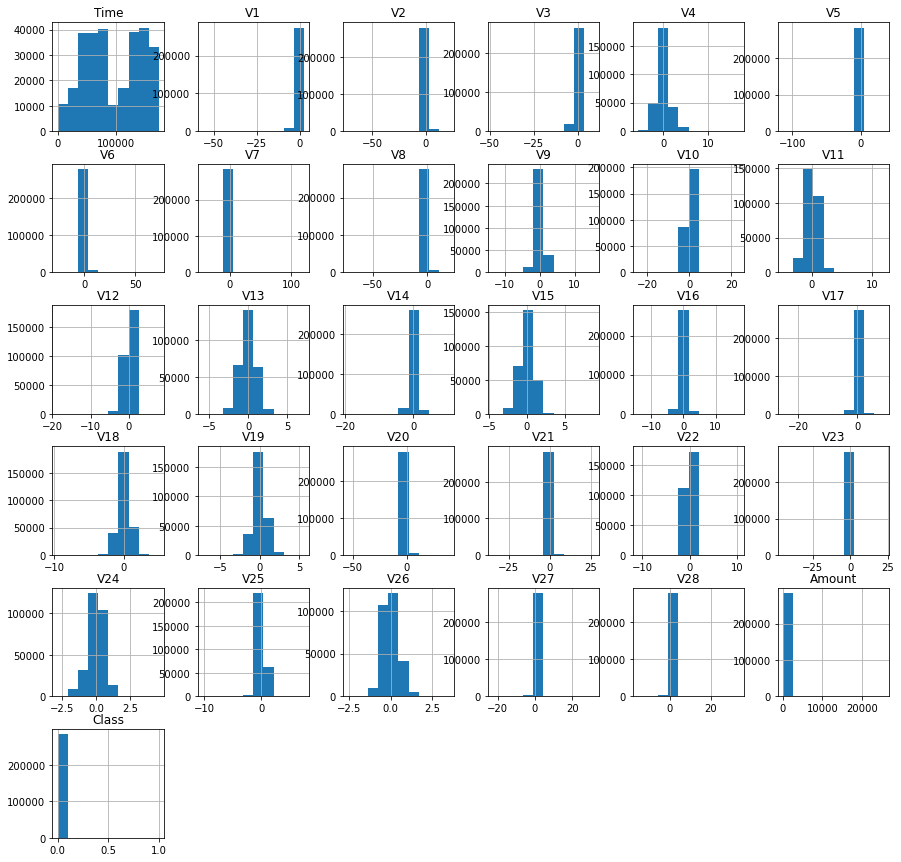

In [25]:
# Plot histograms for each parameter 
import matplotlib.pyplot as plt
df.hist(figsize = (15, 15))
plt.show()


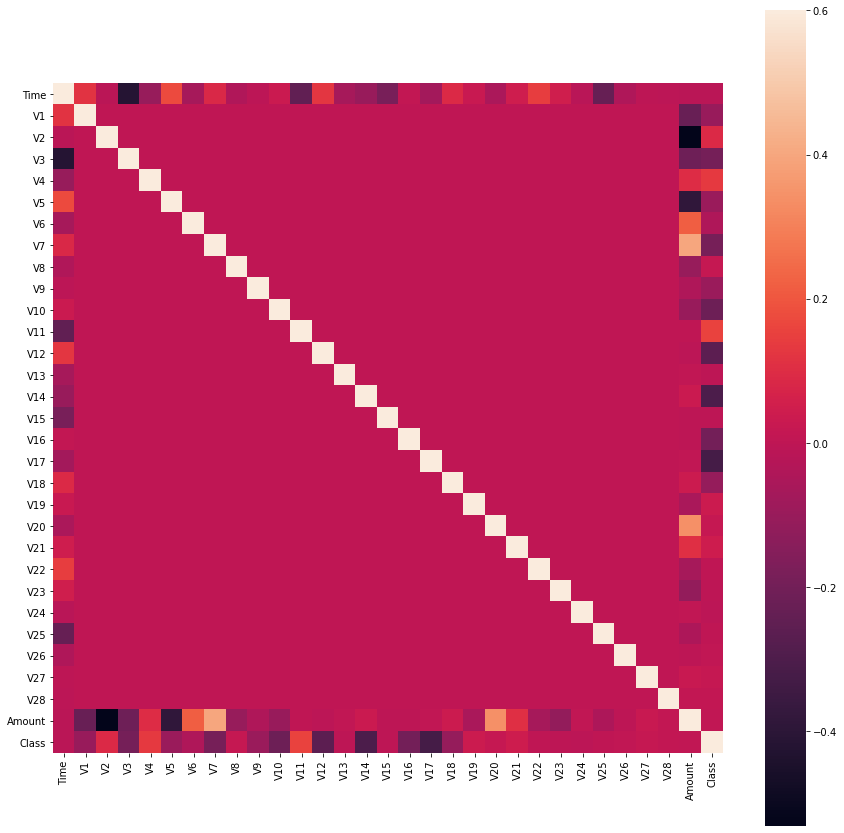

In [26]:
import seaborn as sns
# Correlation matrix

corrmat = df.corr()
fig = plt.figure(figsize = (15, 15))

#Plotting a heatmap to visualize the correlation matrix and see features 
# with strong correlation to the target class
sns.heatmap(corrmat, vmax = .6, square = True) # vmax is the max and min value you want to have for the scale
plt.show()

## Step3 :- Data Preprocessing & Cleaning

In [27]:
pip install -U imbalanced-learn

In [28]:
#creating target series
target=df['Class']


#dropping the target variable from the data set
df.drop('Class',axis=1,inplace=True)
df.shape

#converting them to numpy arrays
X=np.array(df)
y=np.array(target)
X.shape
y.shape

#distribution of the target variable
len(y[y==1])
len(y[y==0])

#splitting the data set into train and test (75:25)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

#applyting SMOTE to oversample the minority class
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=2)
X_sm,y_sm=sm.fit_resample(X_train,y_train)
print(X_sm.shape,y_sm.shape)
print(len(y_sm[y_sm==1]),len(y_sm[y_sm==0]))

(213605, 30) (71202, 30) (213605,) (71202,)
(426448, 30) (426448,)
213224 213224


In [31]:
from sklearn.metrics import confusion_matrix, classification_report, auc, precision_recall_curve, roc_curve

def plot_confusion_matrix(y_test, pred):
    
    y_test_legit = y_test.value_counts()[0]
    y_test_fraud = y_test.value_counts()[1]
    
    cfn_matrix = confusion_matrix(y_test, pred)
    cfn_norm_matrix = np.array([[1.0 / y_test_legit,1.0/y_test_legit],[1.0/y_test_fraud,1.0/y_test_fraud]])
    norm_cfn_matrix = cfn_matrix * cfn_norm_matrix

    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(1,2,1)
    sns.heatmap(cfn_matrix,cmap='coolwarm_r',linewidths=0.5,annot=True,ax=ax)
    plt.title('Confusion Matrix')
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')

    ax = fig.add_subplot(1,2,2)
    sns.heatmap(norm_cfn_matrix,cmap='coolwarm_r',linewidths=0.5,annot=True,ax=ax)

    plt.title('Normalized Confusion Matrix')
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')
    plt.show()
    
    print('---Classification Report---')
    print(classification_report(y_test,pred))

## Step4 :- Model Training & Testing

## A) Logisitic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics


#Logistic Regression
logreg=LogisticRegression()
logreg.fit(X_sm,y_sm)
y_logreg=logreg.predict(X_test)
y_logreg_prob=logreg.predict_proba(X_test)[:,1]


C:\Users\BABA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


---Classification Report---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     71091
           1       0.10      0.83      0.18       111

    accuracy                           0.99     71202
   macro avg       0.55      0.91      0.59     71202
weighted avg       1.00      0.99      0.99     71202



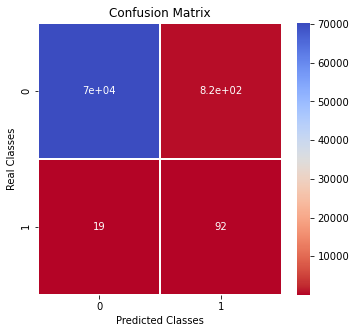

In [38]:
# Confusion Matrix
clf = metrics.confusion_matrix(y_test,y_logreg)

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,2,1)
sns.heatmap(clf,cmap='coolwarm_r',linewidths=0.5,annot=True,ax=ax)
plt.title('Confusion Matrix')
plt.ylabel('Real Classes')
plt.xlabel('Predicted Classes')
print('---Classification Report---')
print(classification_report(y_test,y_logreg))

Accuracy:
 0.9882868458751158
Precision:
 0.10143329658213891
Recall:
 0.8288288288288288
AUC:
 0.9468666666413217


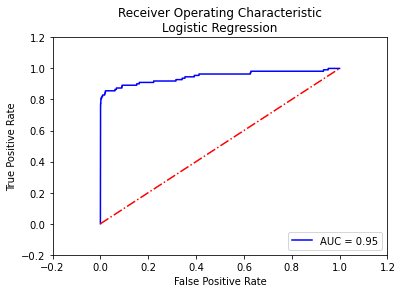

In [39]:
#Performance metrics evaluation
print("Accuracy:\n",metrics.accuracy_score(y_test,y_logreg))
print("Precision:\n",metrics.precision_score(y_test,y_logreg))
print("Recall:\n",metrics.recall_score(y_test,y_logreg))
print("AUC:\n",metrics.roc_auc_score(y_test,y_logreg_prob))
auc=metrics.roc_auc_score(y_test,y_logreg_prob)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_logreg_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nLogistic Regression')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## B) K Nearest neighbors

In [40]:
#K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_sm,y_sm)
y_knn=knn.predict(X_test)
y_knn_prob=knn.predict_proba(X_test)[:,1]



---Classification Report---
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     71091
           1       0.01      0.44      0.02       111

    accuracy                           0.95     71202
   macro avg       0.51      0.69      0.50     71202
weighted avg       1.00      0.95      0.97     71202



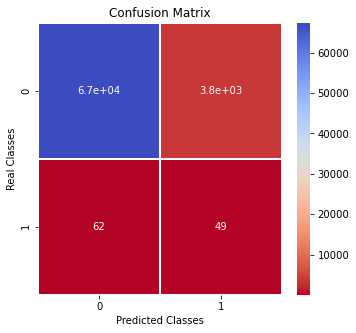

In [41]:
# Confusion Matrix
clf = metrics.confusion_matrix(y_test,y_knn)

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,2,1)
sns.heatmap(clf,cmap='coolwarm_r',linewidths=0.5,annot=True,ax=ax)
plt.title('Confusion Matrix')
plt.ylabel('Real Classes')
plt.xlabel('Predicted Classes')
print('---Classification Report---')
print(classification_report(y_test,y_knn))

Accuracy:
 0.9462093761411197
Precision:
 0.012837306785433586
Recall:
 0.44144144144144143
AUC:
 0.711052171300304


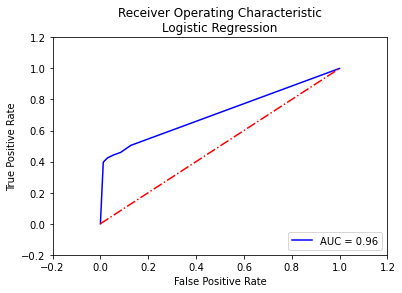

In [76]:
#metrics evaluation
print("Accuracy:\n",metrics.accuracy_score(y_test,y_knn))
print("Precision:\n",metrics.precision_score(y_test,y_knn))
print("Recall:\n",metrics.recall_score(y_test,y_knn))
print("AUC:\n",metrics.roc_auc_score(y_test,y_knn_prob))


#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_knn_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nLogistic Regression')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## C) Random Forest Classifier

In [44]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(criterion='entropy',random_state=3)
rf.fit(X_sm,y_sm)
y_rf=rf.predict(X_test)
y_rf_prob=rf.predict_proba(X_test)[:,1]



---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71091
           1       0.84      0.79      0.81       111

    accuracy                           1.00     71202
   macro avg       0.92      0.90      0.91     71202
weighted avg       1.00      1.00      1.00     71202



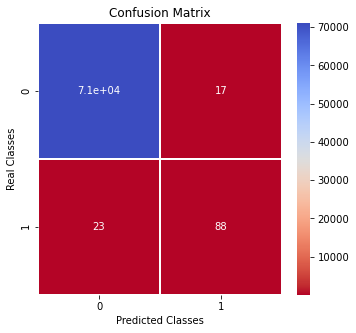

In [45]:
# Confusion Matrix
clf = metrics.confusion_matrix(y_test,y_rf)

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,2,1)
sns.heatmap(clf,cmap='coolwarm_r',linewidths=0.5,annot=True,ax=ax)
plt.title('Confusion Matrix')
plt.ylabel('Real Classes')
plt.xlabel('Predicted Classes')
print('---Classification Report---')
print(classification_report(y_test,y_rf))

Accuracy:
 0.9994382180275835
Precision:
 0.8380952380952381
Recall:
 0.7927927927927928
AUC:
 0.9617669955054434


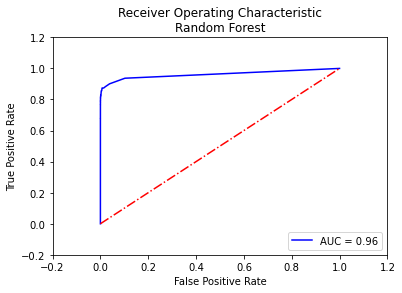

In [46]:
#Performance metrics evaluation
print("Accuracy:\n",metrics.accuracy_score(y_test,y_rf))
print("Precision:\n",metrics.precision_score(y_test,y_rf))
print("Recall:\n",metrics.recall_score(y_test,y_rf))
print("AUC:\n",metrics.roc_auc_score(y_test,y_rf_prob))
auc=metrics.roc_auc_score(y_test,y_rf_prob)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_rf_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Conclusion & Comparison => 

## Thus we trained and tested our model using 3 different Algorithms :- 
## 1. Logistic Regression
## 2. KNN 
## 3. Random Forest Classification

## We conclude that we get highest Accuracy of => 99.943 % using the Random Forest Classification .

## Random forest classifier helped to achieve this due to facts :- 

## 1. The random forest technique can handle big data with numerous variables running into thousands. 
## 2. It can automatically balance data sets when a class is more infrequent than other classes in the data.
## 3. Random forest algorithm avoids and prevents overfitting by using multiple trees.
## 4. It utilizes ensemble learning, which is a technique that combines many classifiers to provide solutions to complex problems .
## 5. Thus , Random Forest is suitable for situations when we have a large dataset, and interpretability is not a major concern .



## Result & Inference  

## Therefore, Accuracy of project = 99.943 % and model is able to detect fraudlent Credit Card transactions using large Dataset .